In [1]:
%load_ext autoreload
%autoreload 2

# Auxiliary LP


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from kinodynamic_feasible import velocity_profile, kinodynamic_feasible_aux
import matplotlib.collections as collections
from Bernstein import BernsteinPolynomial
from math import sqrt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 14

In [6]:
bounds=((0, 1), (-1, 1))
start_state = [0.6, 1]
end_state = [0.6, 0]

L = 0.5
T = np.linspace(0.1, 10, 100)

In [7]:
t = 1.00000000003
x = velocity_profile(L, t, start_state, end_state, bounds)
b = BernsteinPolynomial(x, t).deriv().deriv()
b.plot(show_control_points=True, color="C1")

Velocity profile for agent:
[-0.          0.03157895  0.06608187  0.10350877  0.13940058  0.17236842
  0.20241228  0.22953216  0.25372807  0.275       0.29334795  0.30877193
  0.32280702  0.33976608  0.35964912  0.38245614  0.40818713  0.43684211
  0.46842105]


<AxesSubplot:>

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../a839dd029a1e5824dd2c1bad72857cab.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               [utf8]{inputenc}^^M
No pages of output.
Transcript written on a839dd029a1e5824dd2c1bad72857cab.log.




<Figure size 640x480 with 1 Axes>

In [40]:
aux_val = [kinodynamic_feasible_aux(L, t, start_state, end_state, bounds)[1] for t in T]
original_val = [velocity_profile(L, t, start_state, end_state, bounds) is not None for t in T]

In [41]:
indexs = [idx for idx, val in enumerate(original_val) if val]

In [80]:
indexs

[99]

In [42]:
lb, ub = T[min(indexs + [len(T) - 1])], T[max(indexs + [0])]

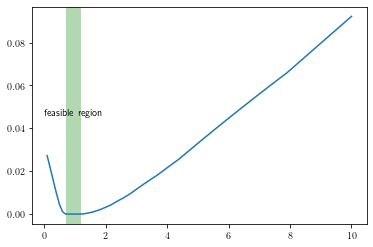

In [43]:
fig, ax = plt.subplots()
ax.plot(T, aux_val)
collection = collections.BrokenBarHCollection.span_where(
    T, ymin=-1, ymax=max(aux_val) + 1, where=original_val, facecolor='green', alpha=0.3)
ax.add_collection(collection)
# ax.set_title('$I(t)$ and feasible interval of original LP')
ax.text((lb + ub) / 2, max(aux_val)/2, 'feasible region', ha="center")
fig.savefig("I_t.pdf")

We could see the feasible are of original LP is very like where auxiliary LP has 0 as optimal.
I think two intervals are slightly different due to numerical error


Now we plot the derivative of aux LP's optimal along time t

In [44]:
from scipy.misc import derivative
I = lambda t: kinodynamic_feasible_aux(L, t, start_state, end_state, bounds)[1]
deriv_aux = [derivative(I, t, 0.001) for t in T]

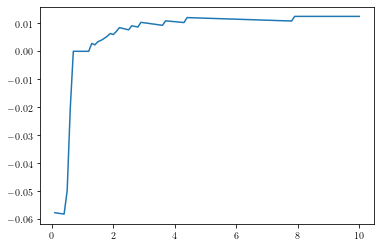

In [45]:
plt.plot(T, deriv_aux)

We may use binary search to find feasible solution

In [50]:
from delta import find_feasible_interval

In [51]:
bounds

((0, 1), (-1, 1))

In [52]:
a = find_feasible_interval(0.25, 0.1, 5, (0,0), (0,0), bounds)

(2.55, 3.1073234263434557e-09)
5.553066687036257e-15


# Delta

In [53]:
a

((1.0693586349487305,
  array([0.        , 0.        , 0.        , 0.00077161, 0.00231483,
         0.00462967, 0.00771611, 0.01157417, 0.01620384, 0.02160512,
         0.02777801, 0.03472251, 0.04243862, 0.05092634, 0.06018568,
         0.07021662, 0.08101918, 0.09259335, 0.10493913, 0.11805652,
         0.13194541, 0.14506269, 0.15740836, 0.16898241, 0.17978485,
         0.18981569, 0.19907491, 0.20756252, 0.21527852, 0.22222291,
         0.22839568, 0.23379685, 0.2384264 , 0.24228434, 0.24537067,
         0.24768539, 0.2492285 , 0.25      , 0.25      , 0.25      ])),
 (4.999990653991699,
  array([0.        , 0.        , 0.        , 0.01686903, 0.0506071 ,
         0.1012142 , 0.1637142 , 0.20934516, 0.2381071 , 0.25      ,
         0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
         0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
         0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
         0.25      , 0.25      , 0.25      , 0.25      , 

Text(0, 0.5, 'velocity $\\frac{d\\ell(t)}{dt}$')

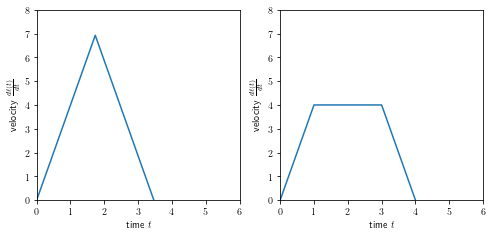

In [12]:
l_a = [(0, sqrt(3), 2 * sqrt(3)), (0, 4 * sqrt(3), 0)]
l_b = [(0, 1, 3, 4), (0, 4, 4, 0)]

xlim = [0, 6]
ylim = [0, 8]

fig, ax = plt.subplots(figsize=(8, 3.5))

ax = plt.subplot(121)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')

plt.plot(l_a[0], l_a[1])


ax = plt.subplot(122)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
plt.plot(l_b[0], l_b[1])
plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')
# plt.savefig("different_velocity.pdf")

In [13]:
from delta import Delta, find_feasible_interval
from kinodynamic_feasible import velocity_profile
from Bernstein import BernsteinPolynomial

In [14]:
l = 12
bounds_l = [(0, 8), (-4, 4)]
bounds_r = [(0, 4), (-4, 4)]

In [15]:
velocity = [0, 0.4, 0.8, 1]
acceleration = [-1, 0, 1]
states = sum([[(v, a) for a in acceleration]for v in velocity], [])

In [16]:
lb_l, ub_l = find_feasible_interval(l, 0.1, 10, (0,), (0,), bounds_l)

lb_r, ub_r = find_feasible_interval(l, 0.1, 10, (0,), (0,), bounds_r)

(5.05, -1.0446504772332332e-07)
2.6332686031693697e-12
(5.05, -1.0021931201587009e-07)
2.633312838618007e-12


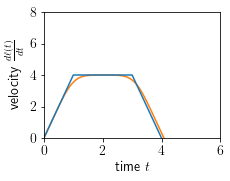

In [21]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
t = lb_r [0]
x = velocity_profile(l, t, (0, 4), (0, -4), bounds_r, 40)
b = BernsteinPolynomial(x, t).deriv()
ax = b.plot(show_control_points=False, color="C1")

plt.plot(l_b[0], l_b[1], color = "C0")
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')
plt.savefig("different_velocity_r.pdf")

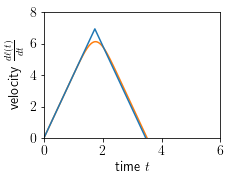

In [22]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
t = lb_l [0]
x = velocity_profile(l, t, (0, 4), (0, -4), bounds_l, 40)
b = BernsteinPolynomial(x, t).deriv()
ax = b.plot(show_control_points=False, color="C1")

plt.plot(l_a[0], l_a[1], color = "C0")
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

plt.xlabel(r'time $t$')
plt.ylabel(r'velocity $\frac{d\ell(t)}{dt}$')
plt.savefig("different_velocity_l.pdf")

In [21]:
import itertools

In [22]:
states = list(itertools.product([0,0.6,1], [-1,0,1]))

In [23]:
l = 0.5

In [24]:
bounds = [(0, 1), (-1, 1)]

In [30]:
d = Delta(l, bounds, states)

((0, -1), (0, -1))
(5.05, 0.028953101860462738)
(2.5749999999999997, 0.01476321512955403)
(1.3375, 0.007668272098033946)
(0.71875, -0.013329068022926993)
(1.028125, -0.006787438757739628)
(1.1828124999999998, 0.0067814040320690605)
(1.10546875, -0.0063261564042793594)
(1.144140625, -0.006547460295290575)
(1.1634765624999999, -0.006658112112860326)
(1.1731445312499997, 0.006725974829174808)
(1.168310546875, 0.006698260149665125)
(1.1658935546875, 0.006684402857615179)
(1.1646850585937498, 0.006677474528177241)
(1.1640808105468747, -0.0066615700369115904)
(1.1643829345703123, -0.006663298918706262)
(1.1645339965820312, 0.006676608081505886)
(1.1644584655761716, 0.006676174986106065)
(1.1644207000732418, -0.006663515191018821)
(1.1644395828247067, 0.006676067092811072)
(1.1644301414489742, 0.006676012531420944)
(1.164425420761108, 0.006675985571649723)
(1.164423060417175, 0.006675971971417671)
(1.1644218802452084, 0.00667596550306751)
(1.164421290159225, 0.0021629200448909647)
((0, -1), (

(0.820263671875, -0.0070112784545176)
(0.8226806640625, 0.004716664759501013)
(0.82147216796875, -0.007016840458283144)
(0.822076416015625, 0.004713200406130866)
(0.8217742919921875, 0.004711468234866803)
(0.8216232299804688, -0.007017535714852474)
(0.8216987609863282, -0.00701788334367924)
(0.8217365264892579, 0.004711251740292799)
(0.8217176437377931, 0.004711143492463696)
(0.8217082023620607, -0.0070179267724814615)
(0.8217129230499269, -0.007017948502061402)
(0.82171528339386, 0.004711129921505103)
(0.8217141032218935, -0.007017953946924713)
(0.8217146933078767, -0.007017956654177537)
((0, 0), (0, -1))
(5.05, 0.0)
-0.0
((0, 0), (0, 0))
(5.05, 2.983724378680108e-09)
1.5421691701433815e-14
((0, 0), (0, 1))
(5.05, 0.028953101860462738)
(2.5749999999999997, 0.014763215372415317)
(1.3375, 0.007668271928898407)
(0.71875, -0.012656768367744209)
(1.028125, -0.005948885585527197)
(1.1828124999999998, -0.0059092385889039645)
(1.2601562499999999, 0.0072248374383826475)
(1.2214843749999997, 0.

(0.9604492187499999, 0.0018803293863893684)
(0.955615234375, 0.001908274242562371)
(0.9531982421874999, -0.007171974955653797)
(0.95440673828125, -0.007179959147845735)
(0.955010986328125, 0.001911767329729544)
(0.9547088623046875, 0.0009566063075678276)
0.00030804730757100045
continuing
(0.9545578002929688, -0.00664840601761205)
(0.9546333312988282, -0.006227366677880042)
(0.9546710968017579, -0.006227613004005771)
(0.9546899795532227, -0.0026358553965248437)
(0.9546994209289551, -0.0026359139239265188)
(0.9547041416168214, -0.002635943196029923)
(0.9547065019607545, 0.0009566201975529098)
0.0003080450496346608
continuing
(0.954705321788788, -0.002635950505178869)
(0.9547059118747712, 0.0009566236610367498)
0.0003080444851454639
continuing
((0, 1), (1, 1))
(5.05, 0.0038998447093180344)
(2.5749999999999997, 0.0026708285084421635)
(1.3375, 0.000404509796562676)
0.00018152377223184694
continuing
(0.71875, -0.010644162526211864)
(1.028125, 0.0006899751703683989)
2.1999362900153224e-05
con

(0.887939453125, -0.007171576683201453)
(0.8903564453125, 0.005104669371664566)
(0.88914794921875, 0.005097741011868967)
(0.888543701171875, 0.005094276534899772)
(0.8882415771484375, 0.005092543947302075)
(0.8880905151367188, 0.005091678400518523)
(0.8880149841308593, 0.005091245060089011)
(0.8879772186279297, -0.007171776486483011)
(0.8879961013793944, -0.007171875862285737)
(0.8880055427551269, 0.0050911911166941215)
(0.8880008220672606, 0.005091164174270135)
(0.8879984617233275, -0.007171888159306777)
(0.887999641895294, -0.007171894877023438)
(0.8880002319812773, 0.005091160175732523)
((0.6, 1), (0.6, -1))
(5.05, 0.014722119877352835)
(2.5749999999999997, 0.012054507192785224)
(1.3375, 0.004455291679745892)
(0.71875, 2.510361710172937e-08)
3.9816240582357665e-15
((0.6, 1), (0.6, 0))
(5.05, 0.011866199516041842)
(2.5749999999999997, 0.0075031025099578375)
(1.3375, 0.002637619450109041)
(0.71875, 8.196710677254324e-08)
4.9622632392051564e-14
((0.6, 1), (0.6, 1))
(5.05, 0.00820670005

(0.9894531249999999, 0.0017126603477427005)
(0.9701171874999999, 0.0018244396889511433)
(0.9604492187499999, 0.0018803294438520836)
(0.955615234375, 0.0019082741558261972)
(0.9531982421874999, -0.007171974975440486)
(0.95440673828125, -0.007179959333515357)
(0.955010986328125, 0.001911767386108057)
(0.9547088623046875, 0.0009566063422622971)
0.000308047307570964
continuing
(0.9545578002929688, -0.006648406045530256)
(0.9546333312988282, -0.006227366657551251)
(0.9546710968017579, -0.006227613070413154)
(0.9546899795532227, -0.0026358554184799377)
(0.9546994209289551, -0.002635913926094923)
(0.9547041416168214, -0.002635943082730796)
(0.9547065019607545, 0.0009566201330428806)
0.0003080450496346378
continuing
(0.954705321788788, -0.0026359505688757466)
(0.9547059118747712, 0.0009566236832628944)
0.0003080444851454268
continuing
((1, 0), (0, 0))
(5.05, 0.007563884726891068)
(2.5749999999999997, 0.005660995327019802)
(1.3375, 0.002389508788318978)
(0.71875, -0.011903967488385153)
(1.02812

(5.05, 0.028953101929851677)
(2.5749999999999997, 0.016523101775689497)
(1.3375, 0.011054774253123345)
(0.71875, 0.004120800891271523)
(0.409375, -0.06267669691844419)
(0.5640625, 0.0032339321287067416)
(0.48671875, -0.05104995805639903)
(0.525390625, -0.03654589756686699)
(0.5447265625, 0.0031230736605766113)
(0.53505859375, -0.030540393312168332)
(0.5398925781249999, -0.030567538853300096)
(0.5423095703124999, 0.003109216533867497)
(0.5411010742187499, 0.0031022885708898926)
(0.5404968261718749, -0.028493491381989013)
(0.5407989501953123, -0.028494973946602623)
(0.5409500122070311, -0.028495714713100244)
(0.5410255432128905, 0.003101854479650376)
(0.5409877777099608, -0.028495900179976476)
(0.5410066604614256, -0.028495992699284663)
(0.5410161018371581, 0.00310180093741029)
(0.5410113811492918, 0.0031017736339469804)
(0.5410090208053587, -0.028496004512751534)
(0.5410102009773252, 0.003101766986703461)
(0.541009610891342, -0.02849600723572529)
((1, 1), (0.6, 0))
(5.05, 0.028953099778

In [54]:
d.save("delta_05_dec_10.pkl")